In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# %cd "/content/drive/My Drive/IoT"
!unzip /content/drive/MyDrive/IoT/DATASET.zip -d /content

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
  inflating: /content/DATASET/TRAIN/R/R_5499.jpg  
  inflating: /content/DATASET/TRAIN/R/R_55.jpg  
  inflating: /content/DATASET/TRAIN/R/R_550.jpg  
  inflating: /content/DATASET/TRAIN/R/R_5500.jpg  
  inflating: /content/DATASET/TRAIN/R/R_5501.jpg  
  inflating: /content/DATASET/TRAIN/R/R_5502.jpg  
  inflating: /content/DATASET/TRAIN/R/R_5503.jpg  
  inflating: /content/DATASET/TRAIN/R/R_5504.jpg  
  inflating: /content/DATASET/TRAIN/R/R_5505.jpg  
  inflating: /content/DATASET/TRAIN/R/R_5506.jpg  
  inflating: /content/DATASET/TRAIN/R/R_5507.jpg  
  inflating: /content/DATASET/TRAIN/R/R_5508.jpg  
  inflating: /content/DATASET/TRAIN/R/R_5509.jpg  
  inflating: /content/DATASET/TRAIN/R/R_551.jpg  
  inflating: /content/DATASET/TRAIN/R/R_5510.jpg  
  inflating: /content/DATASET/TRAIN/R/R_5511.jpg  
  inflating: /content/DATASET/TRAIN/R/R_5512.jpg  
  inflating: /content/DATASET/TRAIN/R/R_5513.jpg  
  inflating: /content/DATASET

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import cv2

import warnings
warnings.filterwarnings('ignore')
import os
for dirname, _, _ in os.walk('/content/DATASET'):
        print(dirname)

/content/DATASET
/content/DATASET/TRAIN
/content/DATASET/TRAIN/R
/content/DATASET/TRAIN/N
/content/DATASET/TEST
/content/DATASET/TEST/R
/content/DATASET/TEST/N


In [ ]:
train_path = "/content/DATASET/TRAIN"
test_path = "/content/DATASET/TEST"

In [ ]:
!pip install tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model


from glob import glob
import cv2
import pandas as pd
from tqdm import tqdm

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model


from glob import glob
import cv2
import pandas as pd
from tqdm import tqdm

In [ ]:
x_data = []
y_data = []

for category in glob(train_path + '/*'):
    for file in tqdm(glob(category + '/*')):
        img_array = cv2.imread(file)
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        x_data.append(img_array)
        y_data.append(category.split("/")[-1])

data = pd.DataFrame({'image': x_data, 'label': y_data})


100%|██████████| 13203/13203 [00:14<00:00, 890.26it/s] 


In [ ]:
data.shape

(24618, 2)

In [ ]:
from collections import Counter
Counter(y_data)

Counter({'R': 11415, 'N': 13203})

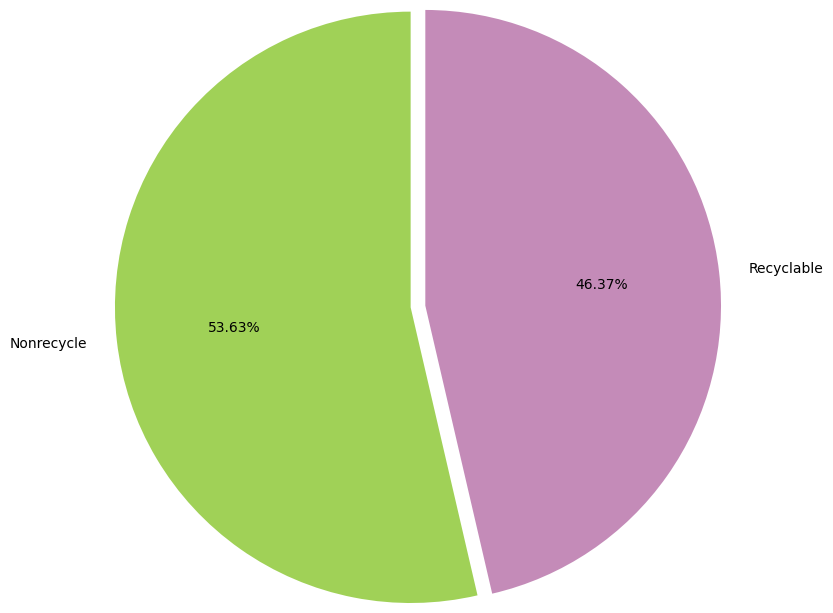

In [ ]:
colors = ['#a0d157','#c48bb8']
plt.pie(data.label.value_counts(),startangle=90,explode=[0.05,0.05],autopct='%0.2f%%',
        labels=['Nonrecycle', 'Recyclable'], colors= colors,radius=2)
plt.show()

In [ ]:
train_datagen = ImageDataGenerator(rescale= 1./255)

In [ ]:
test_datagen = ImageDataGenerator(rescale= 1./255)

In [ ]:
className = glob(train_path + '/*' )
numberOfClass = len(className)
print("Number Of Class: ",numberOfClass)

Number Of Class:  2


In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(128, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(numberOfClass))  # output
model.add(Activation("sigmoid"))
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
train_generator = train_datagen.flow_from_directory(
        train_path,
        target_size= (224,224),
        batch_size = 256,
        color_mode= "rgb",
        class_mode= "categorical")

test_generator = test_datagen.flow_from_directory(
        test_path,
        target_size= (224,224),
        batch_size = 256,
        color_mode= "rgb",
        class_mode= "categorical")

Found 24618 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [ ]:
hist = model.fit(
        x=train_generator,  # Assuming train_generator provides (x, y) pairs
        epochs=40,
        validation_data=test_generator)


Epoch 1/40
97/97 [==============================] - 76s 784ms/step - loss: 0.0205 - accuracy: 0.9931 - val_loss: 0.8156 - val_accuracy: 0.8842
Epoch 2/40
97/97 [==============================] - 71s 726ms/step - loss: 0.0185 - accuracy: 0.9940 - val_loss: 0.9481 - val_accuracy: 0.8723
Epoch 3/40
97/97 [==============================] - 74s 764ms/step - loss: 0.0218 - accuracy: 0.9932 - val_loss: 0.8200 - val_accuracy: 0.8794
Epoch 4/40
97/97 [==============================] - 72s 744ms/step - loss: 0.0153 - accuracy: 0.9950 - val_loss: 0.8957 - val_accuracy: 0.8870
Epoch 5/40
97/97 [==============================] - 71s 735ms/step - loss: 0.0212 - accuracy: 0.9927 - val_loss: 0.7016 - val_accuracy: 0.8874
Epoch 6/40
97/97 [==============================] - 71s 734ms/step - loss: 0.0154 - accuracy: 0.9953 - val_loss: 0.8753 - val_accuracy: 0.8842
Epoch 7/40
97/97 [==============================] - 72s 738ms/step - loss: 0.0190 - accuracy: 0.9945 - val_loss: 0.8260 - val_accuracy: 0.8930